<a href="https://colab.research.google.com/github/effat38718/CVPR_assignment/blob/master/final_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
Data_dir = r"E:\S T U D Y   W O R K S\AIUB SE\9TH SEMESTER\CVPR\final\assignment\dogscats"
Train_dir = os.path.join(Data_dir,'train')
Test_dir = os.path.join(Data_dir,'test1')
valid_dir = os.path.join(Data_dir,'valid')
print(Train_dir)
print(Test_dir)
print(valid_dir)

E:\S T U D Y   W O R K S\AIUB SE\9TH SEMESTER\CVPR\final\assignment\dogscats\train
E:\S T U D Y   W O R K S\AIUB SE\9TH SEMESTER\CVPR\final\assignment\dogscats\test1
E:\S T U D Y   W O R K S\AIUB SE\9TH SEMESTER\CVPR\final\assignment\dogscats\valid


In [ ]:
CATEGORIES = []
for c in os.listdir(Train_dir):
    CATEGORIES.append(c)
print(CATEGORIES)

['cats', 'dogs']


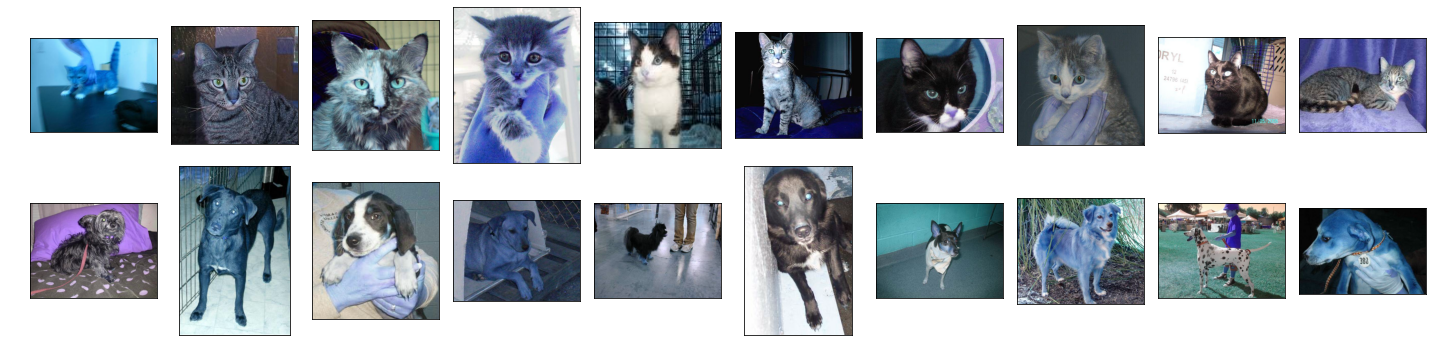

In [ ]:
plt.figure(figsize=(20,5))
temp = 0
for c in CATEGORIES:
    path = os.path.join(Train_dir,c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10, temp+1)
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        if temp%10 == 0:
            plt.ylabel(c, color='white', fontsize=20)
        temp += 1
        if temp%10 == 0:
            break
plt.tight_layout()
plt.show()

In [ ]:
train_data = []
test_data = []
validation_data = []
IMG_SIZE = 227

In [ ]:
for c in CATEGORIES:
    path = os.path.join(Train_dir,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        img_resized = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
        train_data.append([img_resized, class_num])
print(len(train_data))

100%|██████████| 11500/11500 [00:26<00:00, 442.04it/s]

23000


In [ ]:
for c in CATEGORIES:
    path = os.path.join(valid_dir,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        img_resized = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
        validation_data.append([img_resized, class_num])
print(len(validation_data))

100%|██████████| 1000/1000 [00:02<00:00, 371.61it/s]

2000


In [ ]:

for img in tqdm(os.listdir(Test_dir)):
    img_arr = cv2.imread(os.path.join(Test_dir,img))
    img_resized = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
    test_data.append([img_resized, class_num])
print(len(test_data))

100%|██████████| 12500/12500 [00:34<00:00, 365.91it/s]

12500


In [ ]:
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
X_train = []
Y_train = []
for img,label in train_data:
    X_train.append(img)
    Y_train.append(label)
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_SIZE,3)
Y_train = np.array(Y_train)

print(X_train.shape, Y_train.shape)


(5221000, 227, 3) (23000,)


In [ ]:
X_valid = []
Y_valid = []
for img,label in validation_data:
    X_valid.append(img)
    Y_valid.append(label)
X_valid = np.array(X_valid).astype('float32').reshape(-1,IMG_SIZE,3)
Y_valid = np.array(Y_valid)

print(X_valid.shape, Y_valid.shape)

(454000, 227, 3) (2000,)


In [ ]:
X_test = []
Y_test = []
for img,label in test_data:
    X_test.append(img)
    Y_test.append(label)
X_test = np.array(X_test).astype('float32').reshape(-1,IMG_SIZE,3)
Y_test = np.array(Y_test)

print(X_test.shape, Y_test.shape)

MemoryError: Unable to allocate 7.20 GiB for an array with shape (12500, 227, 227, 3) and data type float32

In [ ]:
mean_rgb = np.mean(X_train,axis=(0,1,2))
print(mean_rgb)

115.58833


In [ ]:
model.keras.Sequential([
                        keras.Input(shape=X_train_norm.shape[1:]),

          layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

          layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

          layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

          layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
          layers.Activation('relu'),
          layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),


          layers.Flatten(),

          layers
])